In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Importing fetch_california_housing datasets

In [26]:
data = fetch_california_housing()

In [27]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

### Loading the datasets to a pandas dataframe

In [28]:
house_price_dataframe = pd.DataFrame(data.data, columns = data.feature_names)

In [29]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
# add the target (target) column to the dataframe
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [31]:
house_price_dataframe['target'] = data.target

In [32]:
house_price_dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
#checkin the number of rownss and columns in the dataframee
house_price_dataframe.shape

(20640, 9)

In [34]:
#check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [35]:
#statstical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### understanding the correlation between various features in the datasets

In [36]:
correlation = house_price_dataframe.corr()

<Axes: >

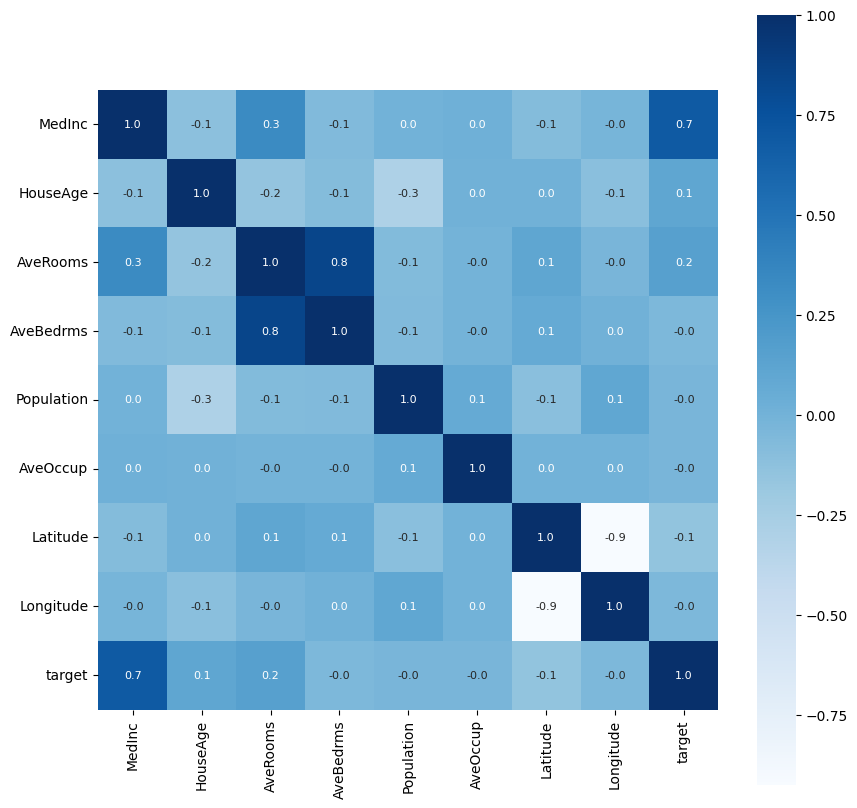

In [37]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot= True, annot_kws = {'size': 8}, cmap= 'Blues')#fmt (how many decimal points after 1),,anno = annotatation dark blue = +ve corr white = -ve corr

### Splitting the data and target

In [38]:
X=house_price_dataframe.drop(columns='target',axis=1)
Y=house_price_dataframe['target']

In [39]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [40]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64


In [41]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [42]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

### Splitting the test and train data 

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2072,1.4817,6.0,4.443645,1.134293,1397.0,3.350120,36.77,-119.84
10600,6.9133,8.0,5.976471,1.026471,862.0,2.535294,33.68,-117.80
2494,1.5536,25.0,4.088785,1.000000,931.0,4.350467,36.60,-120.19
4284,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32
16541,4.0815,21.0,5.166667,1.002688,1130.0,3.037634,37.79,-121.23
...,...,...,...,...,...,...,...,...
1099,3.0625,20.0,5.860000,1.112000,745.0,2.980000,39.59,-121.90
18898,2.6133,49.0,5.163755,1.100437,1131.0,2.469432,38.11,-122.25
11798,4.4958,19.0,5.899767,1.074592,1206.0,2.811189,38.92,-121.22
6637,2.5750,39.0,3.591203,1.086675,2546.0,3.293661,34.16,-118.14


In [46]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10385,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,33.60,-117.65
1943,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,38.62,-120.91
7490,1.7411,35.0,5.369159,1.294393,909.0,4.247664,33.93,-118.23
16889,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,37.59,-122.37
11416,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,33.70,-117.98
...,...,...,...,...,...,...,...,...
13767,4.8173,25.0,6.160494,1.081481,1071.0,2.644444,34.04,-117.12
20606,2.0800,30.0,5.140316,1.055336,1702.0,3.363636,39.12,-121.57
7340,2.1743,30.0,3.364395,0.994437,3208.0,4.461752,33.97,-118.16
14312,1.6023,32.0,3.878788,1.069697,1335.0,4.045455,32.70,-117.14


In [47]:
Y_train

2072     0.720
10600    2.741
2494     0.583
4284     2.000
16541    1.179
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: target, Length: 16512, dtype: float64

In [48]:
Y_test

10385    2.787
1943     2.076
7490     0.967
16889    3.538
11416    3.905
         ...  
13767    1.466
20606    0.566
7340     1.760
14312    0.773
20262    2.354
Name: target, Length: 4128, dtype: float64

### Build the model

In [ ]:
XGB = XGBRegressor()#decision tree based

In [50]:
XGB.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Evaluation of the model : prediction on training data

In [ ]:
##accuracy for prediction on training data
training_data_prediction = XGB.predict(X_train)



In [52]:
training_data_prediction

array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], shape=(16512,), dtype=float32)

In [53]:
### R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

### mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error: ", score_1)##lesser the value more good the model
print("Mean absolute error: ",score_2)

R squared error:  0.943650140819218
Mean absolute error:  0.19336487006121048


In [55]:
##accuracy for prediction on test data
test_data_prediction = XGB.predict(X_test)

In [56]:
### R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

### mean absolute error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error: ", score_3)##lesser the value more good the model
print("Mean absolute error: ",score_4)

R squared error:  0.8338000331788725
Mean absolute error:  0.3108631800268186


### Visualizing the actual prices and predicted prices

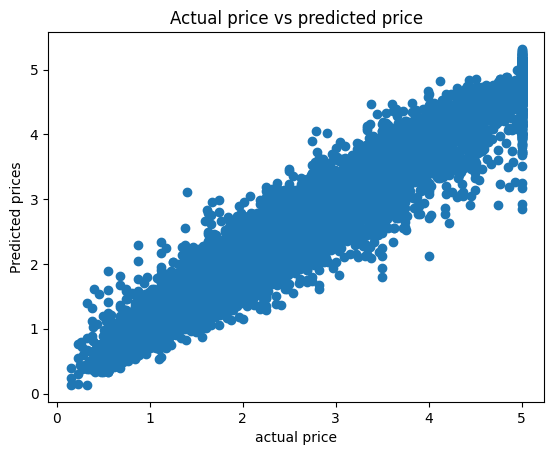

In [57]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("Predicted prices")
plt.title("Actual price vs predicted price")
plt.show()